In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import freud

FileNotFoundError: [Errno 2] No such file or directory: '../Sim_results/bcc16000/pos_005K.dump'

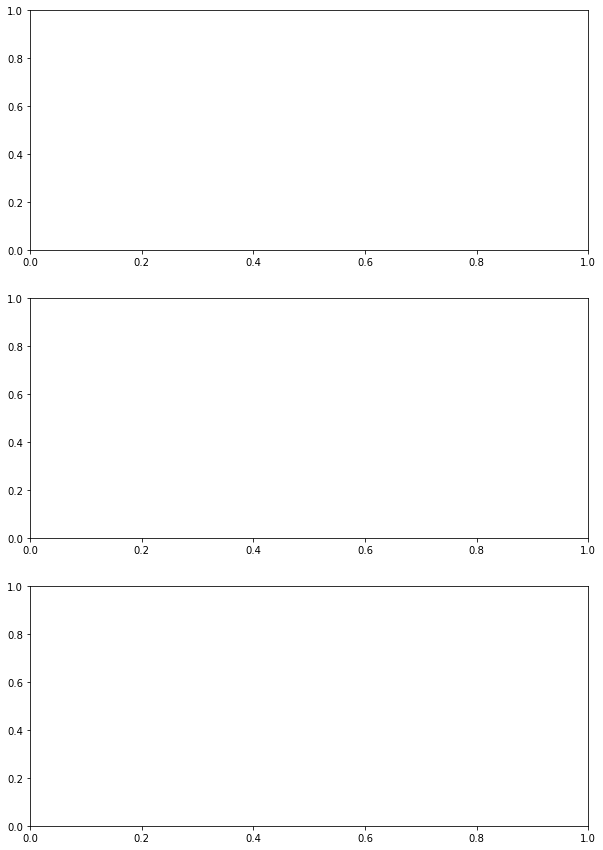

In [2]:
fig, axes = plt.subplots(3,1,figsize = (10,15))
for (i, temp) in enumerate(["005", "014", "100"]):
    # Read data
    N_particles = 16000
    f_path = f"../Sim_results/bcc16000/pos_{temp}K.dump"
    df = pd.read_csv(f_path,skiprows = 9,nrows = N_particles,names = ['id','type','x','y','z'],delim_whitespace=True,index_col = 0)
    
    # Define system
    box = freud.box.Box(Lx=28.724, Ly=28.724, Lz=28.724) 
    A_points = df[df.type==1][['x','y','z']].to_numpy()
    B_points = df[df.type==2][['x','y','z']].to_numpy()
    # Calculate static structure factor
    sf = freud.diffraction.StaticStructureFactorDirect(
        bins=100, k_max=15, k_min=0)
    result= sf.compute(
        (box, A_points),
        query_points=A_points,
        N_total=N_particles)
    result.plot(axes[0])
    axes[0].lines[-1].set_label(f"T = {float(temp)/100}")
    
    result= sf.compute(
        (box, A_points),
        query_points=B_points,
        N_total=N_particles)
    result.plot(axes[1])
    axes[1].lines[-1].set_label(f"T = {float(temp)/100}")
    
    result= sf.compute(
        (box, B_points),
        query_points=B_points,
        N_total=N_particles)
    result.plot(axes[2])
    axes[2].lines[-1].set_label(f"T = {float(temp)/100}")
    
axes[0].set_title("AA")
axes[1].set_title("AB")
axes[2].set_title("BB")
axes[0].legend()
axes[1].legend()
axes[2].legend()
axes[0].grid()
axes[1].grid()
axes[2].grid()




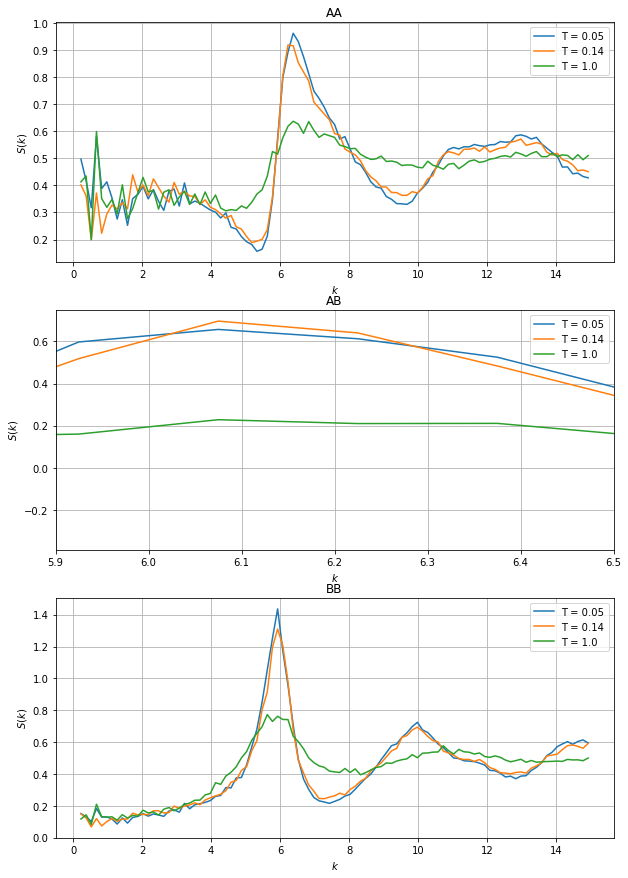

In [3]:
axes[1].set_xlim((5.9,6.5))
fig

In [4]:
# Read data
N_particles = 16000
f_path = "../Sim_results/bcc16000_v2/pos_014K.dump"
df = pd.read_csv(f_path,skiprows = 9,nrows = N_particles,names = ['id','type','x','y','z'],delim_whitespace=True,index_col = 0)

# Define system
box = freud.box.Box(Lx=28.724, Ly=28.724, Lz=28.724) 
A_points = df[df.type==1][['x','y','z']].to_numpy()
B_points = df[df.type==2][['x','y','z']].to_numpy()
# Calculate static structure factor
sf = freud.diffraction.StaticStructureFactorDirect(
    bins=100, k_max=15, k_min=0)
result= sf.compute(
    (box, A_points),
    query_points=A_points,
    N_total=N_particles)

In [6]:
result.S_k
result.bin_centers

array([ 0.075     ,  0.22500001,  0.375     ,  0.52500004,  0.67500001,
        0.82500005,  0.97500002,  1.125     ,  1.2750001 ,  1.42499995,
        1.57500005,  1.72500014,  1.875     ,  2.0250001 ,  2.17500019,
        2.32500005,  2.47500014,  2.625     ,  2.7750001 ,  2.92500019,
        3.07500005,  3.22500014,  3.375     ,  3.5250001 ,  3.67500019,
        3.82500029,  3.97500014,  4.125     ,  4.27500057,  4.42500019,
        4.57499981,  4.72500038,  4.875     ,  5.02500057,  5.17500019,
        5.32499981,  5.47500038,  5.625     ,  5.77500057,  5.92500019,
        6.07499981,  6.22500038,  6.375     ,  6.52500057,  6.67500019,
        6.82500029,  6.97500038,  7.125     ,  7.27500057,  7.42500019,
        7.57500029,  7.72500038,  7.875     ,  8.02500057,  8.17500019,
        8.32500076,  8.47500038,  8.625     ,  8.77500057,  8.92500019,
        9.07500076,  9.22500038,  9.375     ,  9.52500057,  9.67500019,
        9.82500076,  9.97500038, 10.125     , 10.27500057, 10.42

In [5]:
arr = result.k_points
for row in arr:
    if row[0]==0 and row[1]==0:
        print(row)

[0. 0. 0.]
[0.         0.         0.21874338]
[0.         0.         0.43748677]
[0.         0.         0.65623015]
[0.         0.         0.87497354]
[0.         0.         1.09371686]
[0.        0.        1.3124603]
[0.         0.         1.53120375]
[0.         0.         1.74994707]
[0.        0.        1.9686904]
[0.         0.         2.18743372]
[0.         0.         2.40617728]
[0.         0.         2.62492061]
[0.         0.         2.84366393]
[0.         0.         3.06240749]
[0.         0.         3.28115082]
[0.         0.         3.49989414]
[0.         0.         3.71863747]
[0.         0.         3.93738079]
[0.         0.         4.15612411]
[0.         0.         4.37486744]
[0.         0.         4.59361124]
[0.         0.         4.81235456]
[0.         0.         5.03109789]
[0.         0.         5.24984121]
[0.         0.         5.46858454]
[0.         0.         5.68732786]
[0.         0.         5.90607119]
[0.         0.         6.12481499]
[0.         0. 

In [8]:
df = pd.DataFrame(result.k_points, columns=["k1","k2","k3"])
df.to_csv("k_points_fraud.csv")

In [9]:
df = pd.DataFrame(result.S_k,columns = ["S_k"])
df.to_csv("S_k_fraud.csv")

In [7]:
len(arr)

174418